## Astronify's Spectrum preview mode with OBAFGKM samples
Based on data from the MILES library service developed by the Spanish Virtual Observatory in the framework of the IAU Comission G5 Working Group : Spectral Stellar Libraries

In [1]:
from astropy.io import fits,ascii
import numpy as np
import os
import requests
import matplotlib.pyplot as plt

from astropy.table import QTable, Table, Column
from astronify.series import SoniSeries

In [2]:
# File names to save each file when downloaded for the Miles exmaple spectra.
ostar_filename = "1-Type_O_Stelib_HD269698.fits"
bstar_filename = "2-Type_B_HD003369_s0020.fits"
astar_filename = "3-Type_A_HD031295_s0166.fits"
fstar_filename = "4-Type_F_HD222451_s0889.fits"
gstar_filename = "5-Type_G_HD114606_s0462.fits"
kstar_filename = "6-Type_K_HD233832_s0410.fits"
mstar_filename = "7-Type_M_HD036395_s0183.fits"

all_filenames = np.asarray([ostar_filename, bstar_filename, astar_filename, fstar_filename,
                 gstar_filename, kstar_filename, mstar_filename])
n_stars = len(all_filenames)

In [3]:
# These "share" URLs are used to download the sample files.
ostar_link = "https://stsci.box.com/shared/static/v7eecpzpxfnb3fxywy0amve4ofcoz0ns"
bstar_link = "https://stsci.box.com/shared/static/vpoby26z4f7cm9mavlo7fziikb1s3v9n"
astar_link = "https://stsci.box.com/shared/static/wmmwy5im68lnhjcw63iyc8rz3n65f1cr"
fstar_link = "https://stsci.box.com/shared/static/ro5ix00yh19iid9wxlzgi41bjfbremtz"
gstar_link = "https://stsci.box.com/shared/static/yv13duxb5qqtjdfgmsirh8rbyw3r68s2"
kstar_link = "https://stsci.box.com/shared/static/zbqy0bzesz7z8mqu0h0nqzffbnc4h0xg"
mstar_link = "https://stsci.box.com/shared/static/ztq2x6vsx7ickq0zmmimb7qhguu8vz3a"

all_urls = np.asarray([ostar_link, bstar_link, astar_link, fstar_link, gstar_link,
                       kstar_link, mstar_link])

In [4]:
# Download each sample spectrum to the local working directory.
odir = "miles_stellar_spectra"
if not os.path.isdir(odir):
    os.makedirs(odir)

In [5]:
# Download the sample spectra.
for file, url in zip(all_filenames, all_urls):
    print("Downloading " + file + " via " + url + "...")
    response = requests.get(url)
    open(odir + os.path.sep + file, "wb").write(response.content)

In [6]:
# Read in the wavelengths and fluxes of each spectrum.
# We'll store them as a list of dict objects contiaining the wavelengths and fluxes of
# the seven sample spectra.
all_spectra = []
for ii, file in enumerate(all_filenames):
    file = odir + os.path.sep + file
    if os.path.isfile(file):
        with fits.open(file) as hdulist:
            # Read in flux from the data table.
            flux = np.array(hdulist[0].data)
            # Normalize the flux by the maximum value.
            flux_norm = np.reshape(flux/(np.nanmax(flux)), (hdulist[0].header['NAXIS1']))
            # Setup list of wavelengths.
            wave = np.ones(hdulist[0].header["NAXIS1"], dtype=float)
            # Compute the wavelength values from the WCS header keywords.
            for i in range(hdulist[0].header["NAXIS1"]):
                wave[i] = hdulist[0].header["CRVAL1"] + i*hdulist[0].header["CDELT1"]
            hdulist.close()
        # Add this star's wavelength and fluxes to the dict object.
        this_spec = dict()
        this_spec["wls"] = wave
        this_spec["fls"] = flux_norm
        all_spectra.append(this_spec)
    else:
        raise IOError("Could not find expected input file: " + file)

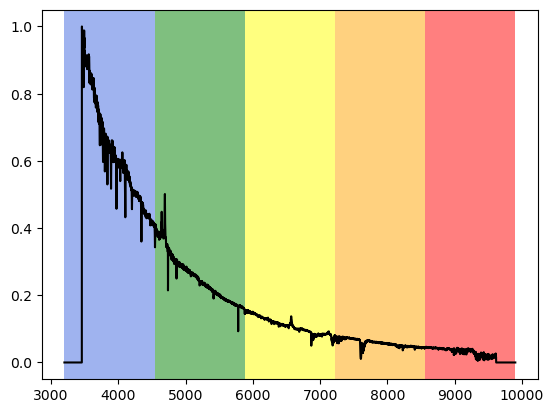

Pyo warning: Portaudio input device `MacBook Pro Microphone` has fewer channels (1) than requested (2).
Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


In [9]:
# Construct the Sonification object.
soni_table = Table([all_spectra[0]["wls"], all_spectra[0]["fls"]],
                             names=["wavelengths", "flux"])

# In an "ensemble" preview, each section is a different pitch frequency.  Each section
# gets played separately, then at the end all sections get played together.
data_soni_ensemble = SoniSeries(soni_table, time_col="wavelengths", val_col="flux",
                                preview_type="ensemble")
ensemble_prev = data_soni_ensemble.preview_object
ensemble_prev.sonify_preview()
ensemble_prev.play_preview()

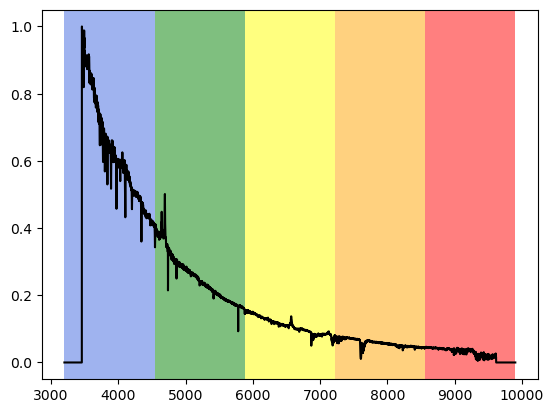

Pyo warning: Portaudio input device `MacBook Pro Microphone` has fewer channels (1) than requested (2).
Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


In [9]:
# In a "scan" preview, each section has the same frequency.  Each section gets
# played separately, and then there is no combined sound made.
data_soni_scan = SoniSeries(soni_table, time_col="wavelengths", val_col="flux",
                       preview_type="scan")
scan_prev = data_soni_scan.preview_object
scan_prev.sonify_preview()
scan_prev.play_preview()

In [ ]:
data_soni = SoniSeries(spectrum_B)
data_soni_preview = data_soni.preview_object
data_soni_preview.sonify_preview()
data_soni_preview.play_preview()

In [ ]:
data_soni = SoniSeries(spectrum_A)
data_soni_preview = data_soni.preview_object
data_soni_preview.sonify_preview()
data_soni_preview.play_preview()

In [ ]:
data_soni = SoniSeries(spectrum_F)
data_soni_preview = data_soni.preview_object
data_soni_preview.sonify_preview()
data_soni_preview.play_preview()

In [ ]:
data_soni = SoniSeries(spectrum_G, flatten=True)
data_soni_preview = data_soni.preview_object
data_soni_preview.sonify_preview()
data_soni_preview.play_preview()

In [ ]:
data_soni = SoniSeries(spectrum_K)
data_soni_preview = data_soni.preview_object
data_soni_preview.sonify_preview()
data_soni_preview.play_preview()

In [10]:
data_soni = SoniSeries(spectrum_M, flatten=True)
data_soni_preview = data_soni.preview_object
data_soni_preview.sonify_preview()
data_soni_preview.play_preview()

NameError: name 'spectrum_M' is not defined